<a href="https://colab.research.google.com/github/BBC-TECH/Experiment-3/blob/main/Experiment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install dependencies (in case not available)
!pip install scikit-learn matplotlib


In [4]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



In [5]:
# Load dataset from given file path
df = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Check first rows
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [6]:
# Define label (binary classification target)
median_val = df['median_house_value'].median()
df['label'] = (df['median_house_value'] > median_val).astype(int)

# Features (all except label column)
X = df.drop(columns=['median_house_value', 'label']).values
y = df['label'].values

print("Feature shape:", X.shape)
print("Labels distribution:", np.bincount(y))


Feature shape: (3000, 8)
Labels distribution: [1500 1500]


In [7]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (2400, 8) Test size: (600, 8)


In [13]:
for lam in [0.01, 0.1, 1]:
    print(f"\nRegularization λ = {lam}")
    model_reg = LogisticRegressionScratch(lr=0.1, epochs=500, reg_strength=lam)
    model_reg.fit(X_train, y_train)
    y_pred_reg = model_reg.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred_reg))
    print("Precision:", precision_score(y_test, y_pred_reg))
    print("Recall:", recall_score(y_test, y_pred_reg))
    print("F1-score:", f1_score(y_test, y_pred_reg))



Regularization λ = 0.01
Accuracy: 0.805
Precision: 0.8288973384030418
Recall: 0.7517241379310344
F1-score: 0.7884267631103075

Regularization λ = 0.1
Accuracy: 0.8066666666666666
Precision: 0.8320610687022901
Recall: 0.7517241379310344
F1-score: 0.7898550724637681

Regularization λ = 1
Accuracy: 0.8066666666666666
Precision: 0.8320610687022901
Recall: 0.7517241379310344
F1-score: 0.7898550724637681


In [14]:
# Check for missing values
print(df.isnull().sum())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
label                 0
dtype: int64


In [15]:
print("NaNs in X:", np.isnan(X).sum())
print("NaNs in y:", np.isnan(y).sum())


NaNs in X: 0
NaNs in y: 0


In [16]:
# Find number of duplicate rows
print("Duplicate rows before drop:", df.duplicated().sum())

# Drop duplicates inplace
df.drop_duplicates(inplace=True)

# Check again
print("Duplicate rows after drop:", df.duplicated().sum())


Duplicate rows before drop: 0
Duplicate rows after drop: 0


In [17]:
# Check if any duplicates remain
print(df.duplicated().any())


False


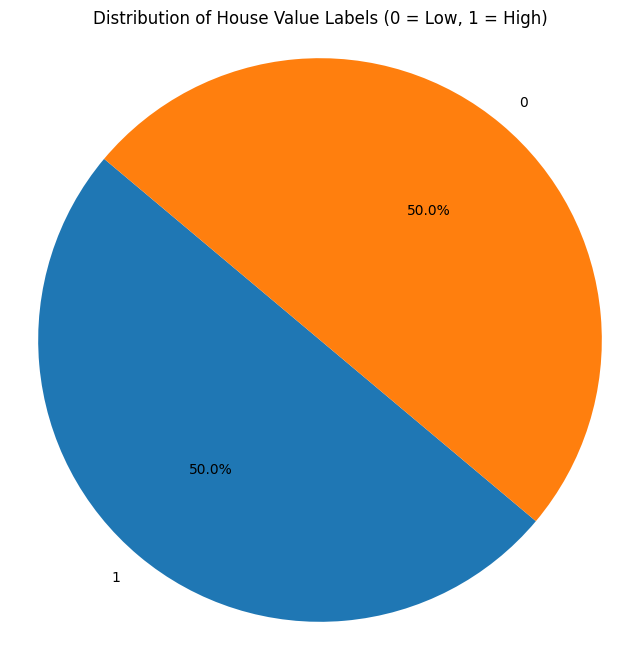

In [18]:
# Calculate the count of each label
label_counts = df['label'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of House Value Labels (0 = Low, 1 = High)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


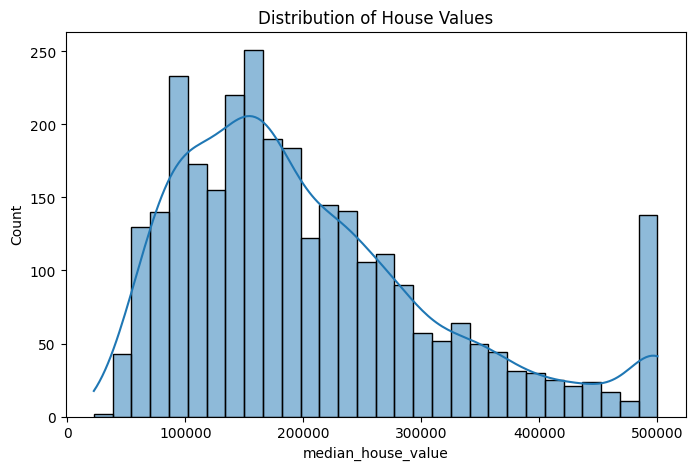

In [19]:
import seaborn as sns

# Histogram of house values
plt.figure(figsize=(8,5))
sns.histplot(df['median_house_value'], bins=30, kde=True)
plt.title("Distribution of House Values")
plt.show()


In [21]:
from sklearn.preprocessing import LabelEncoder

# Encode 'label' (low=0, high=1)
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,label
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,1
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,1
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,1
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,0


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [26]:
# Load California Housing dataset
df = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Check first few rows
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [27]:
# Check for null values
print("Null values:\n", df.isnull().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)

# Verify duplicates removed
print("Any duplicates left?", df.duplicated().any())


Null values:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64
Any duplicates left? False


In [28]:
median_val = df['median_house_value'].median()
df['label'] = (df['median_house_value'] > median_val).astype(int)

# Features and target
X = df.drop(columns=['median_house_value', 'label']).values
y = df['label'].values

print("Feature shape:", X.shape)
print("Label distribution:", np.bincount(y))


Feature shape: (3000, 8)
Label distribution: [1500 1500]


In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (2400, 8)
Test shape: (600, 8)


In [31]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000, reg_strength=0.0):
        self.lr = lr
        self.epochs = epochs
        self.reg_strength = reg_strength  # L2 regularization

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)  # initialize weights
        self.losses = []

        for i in range(self.epochs):
            z = X.dot(self.theta)
            y_hat = self.sigmoid(z)

            # Binary cross-entropy loss + L2 regularization
            loss = (-1/m) * (np.dot(y, np.log(y_hat+1e-9)) + np.dot((1-y), np.log(1-y_hat+1e-9)))
            reg_term = (self.reg_strength/(2*m)) * np.sum(self.theta**2)
            self.losses.append(loss + reg_term)

            # Gradient
            grad = (1/m) * X.T.dot(y_hat - y) + (self.reg_strength/m) * self.theta
            self.theta -= self.lr * grad

    def predict(self, X):
        return (self.sigmoid(X.dot(self.theta)) >= 0.5).astype(int)


In [32]:
model = LogisticRegressionScratch(lr=0.1, epochs=1000, reg_strength=0.01)
model.fit(X_train, y_train)


In [33]:
y_pred = model.predict(X_test)


In [34]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8216666666666667
Precision: 0.8327272727272728
Recall: 0.7896551724137931
F1-score: 0.8106194690265487
Confusion Matrix:
 [[264  46]
 [ 61 229]]


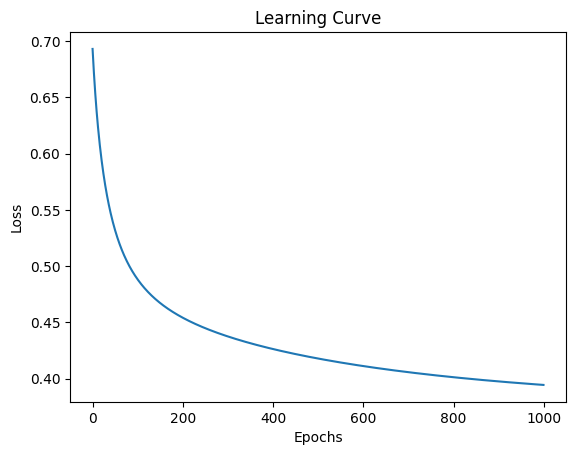

In [35]:
plt.plot(model.losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.show()


**Now Use sklearn library to fit the data using logistic regression and compare results**

In [36]:
from sklearn.linear_model import LogisticRegression


In [37]:
# Initialize Logistic Regression with L2 regularization (default)
sk_model = LogisticRegression(max_iter=1000, C=1.0, random_state=42)

# Fit model on training data
sk_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [38]:
y_pred_sk = sk_model.predict(X_test)


In [39]:
print("=== Logistic Regression (sklearn) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_sk))
print("Precision:", precision_score(y_test, y_pred_sk))
print("Recall:", recall_score(y_test, y_pred_sk))
print("F1-score:", f1_score(y_test, y_pred_sk))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sk))


=== Logistic Regression (sklearn) ===
Accuracy: 0.8283333333333334
Precision: 0.8235294117647058
Recall: 0.8206896551724138
F1-score: 0.8221070811744386
Confusion Matrix:
 [[259  51]
 [ 52 238]]


In [40]:
print("=== Comparison ===")
print("Accuracy - Scratch:", accuracy_score(y_test, y_pred))
print("Accuracy - Sklearn:", accuracy_score(y_test, y_pred_sk))

print("F1-score - Scratch:", f1_score(y_test, y_pred))
print("F1-score - Sklearn:", f1_score(y_test, y_pred_sk))


=== Comparison ===
Accuracy - Scratch: 0.8216666666666667
Accuracy - Sklearn: 0.8283333333333334
F1-score - Scratch: 0.8106194690265487
F1-score - Sklearn: 0.8221070811744386
